**Importing libraries**

In [13]:
library(tidyverse)
library(repr)
library(dplyr)
library(tidymodels)

**Demonstrate that the dataset can be read from the web into R**

In [14]:
# downloading data to fiel_path
url <- "https://archive.ics.uci.edu/static/public/45/heart+disease.zip"
temp_file <- tempfile(fileext = ".zip")
download.file(url, destfile = temp_file, mode = "wb")
unzip(temp_file, exdir = "GroupProject/heart_data")
file_path <- "GroupProject/heart_data/cleve.mod"


# reading data into heart_data
heart_data <- read_table(file_path, skip = 20)


── Column specification ────────────────────────────────────────────────────────
cols(
  `63.0` = col_double(),
  male = col_character(),
  angina = col_character(),
  `145.0` = col_double(),
  `233.0` = col_double(),
  true = col_character(),
  hyp = col_character(),
  `150.0` = col_double(),
  fal = col_character(),
  `2.3` = col_double(),
  down = col_character(),
  `0.0` = col_character(),
  fix = col_character(),
  buff = col_character(),
  H = col_character()
)



**Clean and wrangle your data into a tidy format**

In [15]:
# assigning  names to each column
names <- c("age","sex","chest_pain_type","resting_bp",
                    "cholesterol","fasting_blood_sugar", "resting_ecg",
                    "max_heart_rate","exercise_induced_angina","oldpeak",
                    "slope","number_of_vessels_colored","thal","healthy")
colnames(heart_data) <- names

# selecting useful columns (see below for justification of exclusion of oldpeak and slope)
heart_data <- heart_data|> 
    select(age,sex,resting_bp,cholesterol,max_heart_rate, healthy)

head(heart_data)

age,sex,resting_bp,cholesterol,max_heart_rate,healthy
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
67,male,160,286,108,sick
67,male,120,229,129,sick
37,male,130,250,187,buff
41,fem,130,204,172,buff
56,male,120,236,178,buff
62,fem,140,268,160,sick


**Spliting data**

In [16]:
# splitting data into training and testing
set.seed(2004)

#Turning healthy and sex into factors

heart_data |>
  distinct(healthy)
heart_data <- heart_data |>
  mutate(healthy = as_factor(healthy)) |>
  mutate(healthy = fct_recode(healthy, "sick" = "sick", "healthy" = "buff"))

heart_data <-heart_data|>
  mutate(sex=as_factor(sex))|>
  mutate(sex = fct_recode(sex, "male" = "male", "female" = "fem"))
heart_data 


heart_disease_split <- initial_split(heart_data,prop = 0.75, strata = healthy)
heart_disease_train <- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split)

healthy
<chr>
sick
buff


age,sex,resting_bp,cholesterol,max_heart_rate,healthy
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>
67,male,160,286,108,sick
67,male,120,229,129,sick
37,male,130,250,187,healthy
41,female,130,204,172,healthy
56,male,120,236,178,healthy
62,female,140,268,160,sick
57,female,120,354,163,healthy
63,male,130,254,147,sick
53,male,140,203,155,sick


In [17]:
# I plan to use Trestbps, Cholesteral and Max_Heart_Rate as predictors
# None of the rows have missing data since we already addressed this issue when importing the data
# Datasets below shows the count for healhty and sick observations and mean of each of our predictors 


heart_disease_info <- heart_disease_train |>
    mutate(observation_count = n()) |>
    mutate(mean_resting_bp = mean(resting_bp)) |>
    mutate(mean_cholesterol = mean(cholesterol)) |>
    mutate(mean_max_heart_rate = mean(max_heart_rate)) |>
    mutate(mean_age = mean(age)) |>
    #mutate(mean_number_of_blood_vesels = mean(number_of_vessels_colored)) |>
    select(observation_count,mean_age,mean_resting_bp,mean_cholesterol,mean_max_heart_rate) |>
    distinct()

sick_data <- heart_disease_train |>
    filter(healthy == "sick") |>
    mutate(observation_count = n()) |>
    mutate(sick_mean_resting_bp = mean(resting_bp)) |>
    mutate(sick_mean_cholesterol = mean(cholesterol)) |>
    mutate(sick_mean_max_heart_rate = mean(max_heart_rate)) |>
    mutate(sick_mean_age = mean(age)) |>
    #mutate(sick_mean_number_of_blood_vesels = mean(number_of_vessels_colored)) |>
    select(observation_count,sick_mean_age,sick_mean_resting_bp,sick_mean_cholesterol,sick_mean_max_heart_rate) |>
    distinct()

healthy_data <- heart_disease_train |>
    filter(healthy == "buff") |>
    mutate(observation_count = n()) |>
    mutate(healthy_mean_resting_bp = mean(resting_bp)) |>
    mutate(healthy_mean_cholesterol = mean(cholesterol)) |>
    mutate(healthy_mean_max_heart_rate = mean(max_heart_rate)) |>
    mutate(healthy_mean_age = mean(age)) |>
    #mutate(healthy_mean_number_of_blood_vesels = mean(healthy_number_of_vessels_colored)) |>
    select(observation_count,healthy_mean_age,healthy_mean_resting_bp,healthy_mean_cholesterol,healthy_mean_max_heart_rate) |>
    distinct()

heart_disease_info
sick_data
healthy_data

observation_count,mean_age,mean_resting_bp,mean_cholesterol,mean_max_heart_rate
<int>,<dbl>,<dbl>,<dbl>,<dbl>
226,54.57522,131.4027,247.0354,149.5177


observation_count,sick_mean_age,sick_mean_resting_bp,sick_mean_cholesterol,sick_mean_max_heart_rate
<int>,<dbl>,<dbl>,<dbl>,<dbl>
103,56.42718,134.9417,248.699,139.2233


observation_count,healthy_mean_age,healthy_mean_resting_bp,healthy_mean_cholesterol,healthy_mean_max_heart_rate
<int>,<dbl>,<dbl>,<dbl>,<dbl>


In [18]:
#summarizing the data by getting number of sick and healthy
healthy_proportions <- heart_disease_train |>
                      group_by(healthy) |>
                      summarize(n = n()) |>
                      mutate(percent = 100*n/nrow(heart_disease_train))
healthy_proportions

healthy,n,percent
<fct>,<int>,<dbl>
sick,103,45.57522
healthy,123,54.42478


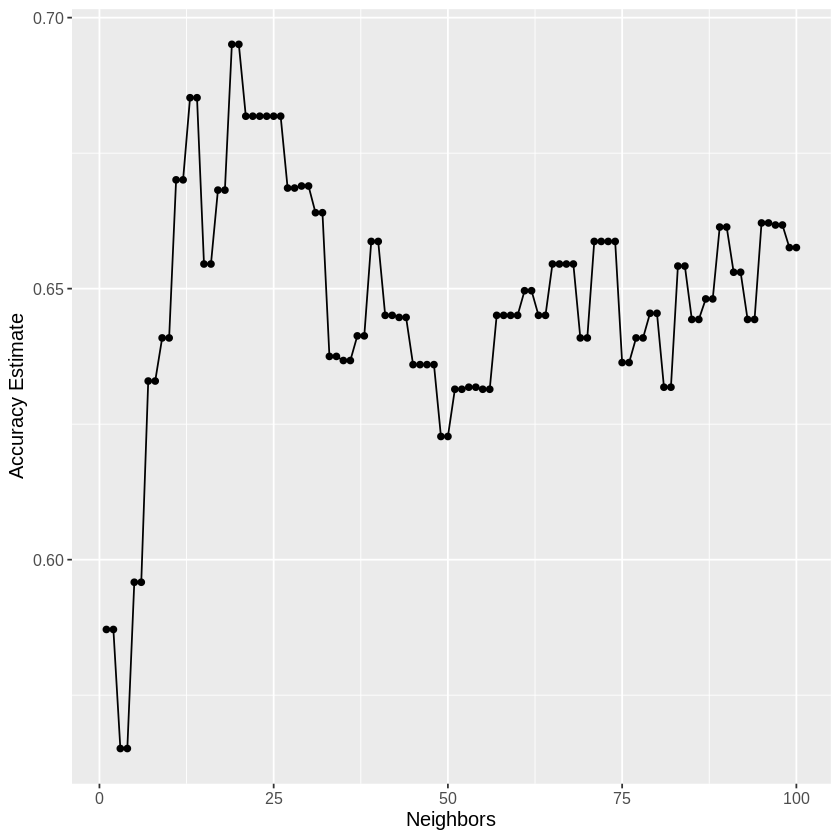

In [19]:
#Classifying Part A: choosing the K value
set.seed(1920)
heart_recipe <- recipe(healthy ~ age+resting_bp+cholesterol+max_heart_rate, data = heart_disease_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

heart_vfold <- vfold_cv(heart_disease_train, v = 10, strata = healthy)
k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 1))

knn_results <- workflow() |>
  add_recipe(heart_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = heart_vfold, grid = k_vals) |>
  collect_metrics() 

accuracies <- knn_results |>
  filter(.metric == "accuracy")

accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  theme(text = element_text(size = 12))

accuracy_vs_k

**Choosing our K**: 
Looking at the plot above, we can see that setting the K=19 will give us the highest accuracy which is at about 68%. 
Therefore we choose K to be 19. 

In [23]:
#Classifying the data
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 19) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(heart_recipe) |>
  add_model(knn_spec) |>
  fit(data = heart_disease_train)
knn_fit


heart_test_predictions <- predict(knn_fit, heart_disease_test) |>
  bind_cols(heart_disease_test)

heart_test_predictions

heart_test_predictions |>
  metrics(truth = healthy, estimate = .pred_class) |>
  filter(.metric == "accuracy")


confusion <- heart_test_predictions |>
             conf_mat(truth = healthy, estimate = .pred_class)
confusion

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(19,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3097345
Best kernel: rectangular
Best k: 19

.pred_class,age,sex,resting_bp,cholesterol,max_heart_rate,healthy
<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>
healthy,67,male,120,229,129,sick
healthy,41,female,130,204,172,healthy
healthy,56,male,120,236,178,healthy
sick,63,male,130,254,147,sick
healthy,53,male,140,203,155,sick
healthy,58,female,150,283,162,healthy
healthy,58,female,120,340,172,healthy
sick,66,female,150,226,114,healthy
healthy,43,male,150,247,171,healthy


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6710526


          Truth
Prediction sick healthy
   sick      17       7
   healthy   18      34